<a href="https://colab.research.google.com/github/Existanze54/sirius-neural-networks-2024/blob/main/Practices/S11_AutoML_LLM/1_AutoGluon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Краткий обзор AutoML иструментов в 2024 году: <a href='https://habr.com/ru/articles/811425/'>link</a>

<center><img src="https://github.com/Existanze54/sirius-neural-networks-2024/blob/main/Images/AutoGluon.png?raw=true" width=600></img></center>

AutoGluon github репозиторий: <a href='https://github.com/autogluon/autogluon'>link</a>

AutoGluon — "Fast and Accurate ML in 3 Lines of Code". Библиотека от парней из Amazon. В 2023-2024 году AutoGluon, пожалуй, самая перспективная библиотека, которая выжмет из данных все. Однако, замечу, что про 3 строчки кода упомянутые выше, это все же про маркетинг. API имеет не одну страницу документации. В AG есть три модуля: Tabular, Multimodal, Time-series. Суперсила AG - это блендинг и стекинг моделей.

In [ ]:
!pip install autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.5/308.5 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 427.5/427.5 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.1/147.1 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.1/65.1 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 49.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 936.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 75.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━

# Import Libraries

In [ ]:
from autogluon.tabular import TabularPredictor as task

In [ ]:
import numpy as np
import pandas as pd

# Load Data

In [ ]:
train_df = pd.read_csv('https://raw.githubusercontent.com/Existanze54/sirius-neural-networks-2024/main/Datasets/patient-survival-prediction/train_preprocessed.csv')
print(train_df.shape)
train_df.head()

(44939, 83)


,Unnamed: 0,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_id,...,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,0,118.0,69.9,25.719814,0.0,2.0,0.0,162.6,0.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,4.0,1
1,1,185.0,57.0,20.357278,0.0,0.0,1.0,182.9,0.0,687.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0
2,2,99.0,71.0,30.558683,0.0,5.0,1.0,175.2,0.0,514.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,3,21.0,75.0,44.990982,0.0,2.0,1.0,175.2,3.0,504.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,4.0,0
4,4,70.0,62.0,16.620499,0.0,0.0,0.0,152.0,0.0,464.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
test_df = pd.read_csv('https://raw.githubusercontent.com/Existanze54/sirius-neural-networks-2024/main/Datasets/patient-survival-prediction/test_preprocessed.csv')
print(test_df.shape)
test_df.head()

(19260, 83)


,Unnamed: 0,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_id,...,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,0,188.0,69.0,29.605976,0.0,2.0,0.0,165.1,0.0,840.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0
1,1,10.0,68.0,27.986953,0.0,2.0,1.0,185.4,0.0,428.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,4.0,0
2,2,176.0,55.0,32.641470,1.0,2.0,0.0,162.6,2.0,611.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0
3,3,19.0,53.0,19.444444,0.0,2.0,1.0,180.0,3.0,653.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0
4,4,128.0,74.0,16.508909,0.0,2.0,0.0,165.1,1.0,377.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0


In [ ]:
train_data = task.Dataset(data=train_df)
test_data = task.Dataset(data=test_df)

In [ ]:
label_column = 'hospital_death'
train_data[label_column].describe()

count    44939.000000
mean         0.086762
std          0.281489
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: hospital_death, dtype: float64

# Build Model

In [ ]:
%%time
predictor = task(label=label_column).fit(train_data)

No path specified. Models will be saved in: "AutogluonModels/ag-20240521_185201"
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20240521_185201"
=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Apr 28 14:29:16 UTC 2024
C

CPU times: user 7min 21s, sys: 4 s, total: 7min 25s
Wall time: 5min 59s


In [ ]:
predictor.model_best

'WeightedEnsemble_L2'

In [ ]:
%%bash
sudo apt-get install graphviz graphviz-dev

Reading package lists...
Building dependency tree...
Reading state information...
graphviz is already the newest version (2.42.2-6).
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 45 not upgraded.
Need to get 2,433 kB of archives.
After this operation, 7,694 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgtk2.0-0 amd64 2.24.33-2ubuntu2 [2,037 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgail18 amd64 2.24.33-2ubuntu2 [15.9 kB]
Get:4 http://archiv

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 9.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


In [ ]:
!pip install pygraphviz

  Using cached pygraphviz-1.13.tar.gz (104 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pygraphviz: filename=pygraphviz-1.13-cp310-cp310-linux_x86_64.whl size=168497 sha256=61a8ad2e096f99fd201e86f38c82f05cd7f532ad1a99ed0c6298cd90536c1b14
  Stored in directory: /root/.cache/pip/wheels/c5/96/10/6c25add1fffc368b1927252bf73b63fcb938de8f4486e23691
Successfully built pygraphviz


In [ ]:
predictor.plot_ensemble_model()

'AutogluonModels/ag-20240521_185201/ensemble_model.png'

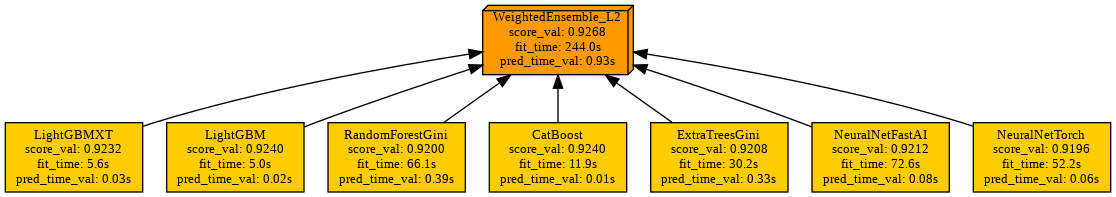

In [ ]:
from PIL import Image

im = Image.open("AutogluonModels/ag-20240521_185201/ensemble_model.png")
im

# Prediction on test data

In [ ]:
y_test = test_data[label_column]

test_data_n = test_data.drop(labels=[label_column], axis=1)
test_data_n

,Unnamed: 0,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_id,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,0,188.0,69.0,29.605976,0.0,2.0,0.0,165.1,0.0,840.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,1,10.0,68.0,27.986953,0.0,2.0,1.0,185.4,0.0,428.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,4.0
2,2,176.0,55.0,32.641470,1.0,2.0,0.0,162.6,2.0,611.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,3,19.0,53.0,19.444444,0.0,2.0,1.0,180.0,3.0,653.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,4,128.0,74.0,16.508909,0.0,2.0,0.0,165.1,1.0,377.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19255,19255,166.0,74.0,29.267021,0.0,2.0,1.0,185.4,0.0,700.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19256,19256,204.0,78.0,22.862012,0.0,2.0,0.0,162.5,1.0,426.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,6.0
19257,19257,2.0,30.0,27.113144,0.0,2.0,1.0,182.9,0.0,876.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,4.0
19258,19258,133.0,72.0,18.690085,0.0,2.0,0.0,167.6,3.0,549.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y_pred = predictor.predict(test_data_n)
y_pred

0        0
1        0
2        0
3        0
4        0
        ..
19255    0
19256    0
19257    0
19258    0
19259    0
Name: hospital_death, Length: 19260, dtype: int64

In [ ]:
pred_f = predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)
pred_f

{'accuracy': 0.9277777777777778,
 'balanced_accuracy': 0.628672688294681,
 'mcc': 0.4039099821320559,
 'f1': 0.38749449581682077,
 'precision': 0.6984126984126984,
 'recall': 0.2681291895185862}

In [ ]:
predictor.problem_type

'binary'

In [ ]:
predictor.feature_metadata

In [ ]:
predictor.predict_proba(test_data_n)

,0,1
0,0.993986,0.006014
1,0.980874,0.019126
2,0.991966,0.008034
3,0.986517,0.013483
4,0.892747,0.107253
...,...,...
19255,0.971447,0.028553
19256,0.855726,0.144274
19257,0.990805,0.009195
19258,0.975876,0.024124


# Check Leaderboard

In [ ]:
predictor.leaderboard()

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.9268,accuracy,0.934900,243.954411,0.001355,0.242085,2,True,14
1,CatBoost,0.9240,accuracy,0.013469,11.912773,0.013469,11.912773,1,True,7
2,LightGBM,0.9240,accuracy,0.023975,5.005520,0.023975,5.005520,1,True,4
3,LightGBMXT,0.9232,accuracy,0.027139,5.597704,0.027139,5.597704,1,True,3
4,LightGBMLarge,0.9228,accuracy,0.014595,6.182489,0.014595,6.182489,1,True,13
5,XGBoost,0.9228,accuracy,0.021940,3.746312,0.021940,3.746312,1,True,11
6,NeuralNetFastAI,0.9212,accuracy,0.082523,72.588346,0.082523,72.588346,1,True,10
7,ExtraTreesGini,0.9208,accuracy,0.333178,30.249756,0.333178,30.249756,1,True,8
8,RandomForestEntr,0.9200,accuracy,0.171272,65.769283,0.171272,65.769283,1,True,6
9,RandomForestGini,0.9200,accuracy,0.393779,66.127773,0.393779,66.127773,1,True,5


In [ ]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2     0.9268    accuracy       0.934900  243.954411                0.001355           0.242085            2       True         14
1              CatBoost     0.9240    accuracy       0.013469   11.912773                0.013469          11.912773            1       True          7
2              LightGBM     0.9240    accuracy       0.023975    5.005520                0.023975           5.005520            1       True          4
3            LightGBMXT     0.9232    accuracy       0.027139    5.597704                0.027139           5.597704            1       True          3
4         LightGBMLarge     0.9228    accuracy       0.014595    6.182489                0.014595           6.182489            1       True         13
5               XGBoost   

{'model_types': {'KNeighborsUnif': 'KNNModel',
  'KNeighborsDist': 'KNNModel',
  'LightGBMXT': 'LGBModel',
  'LightGBM': 'LGBModel',
  'RandomForestGini': 'RFModel',
  'RandomForestEntr': 'RFModel',
  'CatBoost': 'CatBoostModel',
  'ExtraTreesGini': 'XTModel',
  'ExtraTreesEntr': 'XTModel',
  'NeuralNetFastAI': 'NNFastAiTabularModel',
  'XGBoost': 'XGBoostModel',
  'NeuralNetTorch': 'TabularNeuralNetTorchModel',
  'LightGBMLarge': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif': 0.9092,
  'KNeighborsDist': 0.9092,
  'LightGBMXT': 0.9232,
  'LightGBM': 0.924,
  'RandomForestGini': 0.92,
  'RandomForestEntr': 0.92,
  'CatBoost': 0.924,
  'ExtraTreesGini': 0.9208,
  'ExtraTreesEntr': 0.9192,
  'NeuralNetFastAI': 0.9212,
  'XGBoost': 0.9228,
  'NeuralNetTorch': 0.9196,
  'LightGBMLarge': 0.9228,
  'WeightedEnsemble_L2': 0.9268},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'KNeighborsUnif': ['KNeighborsUnif'],
  'KNeighborsDi